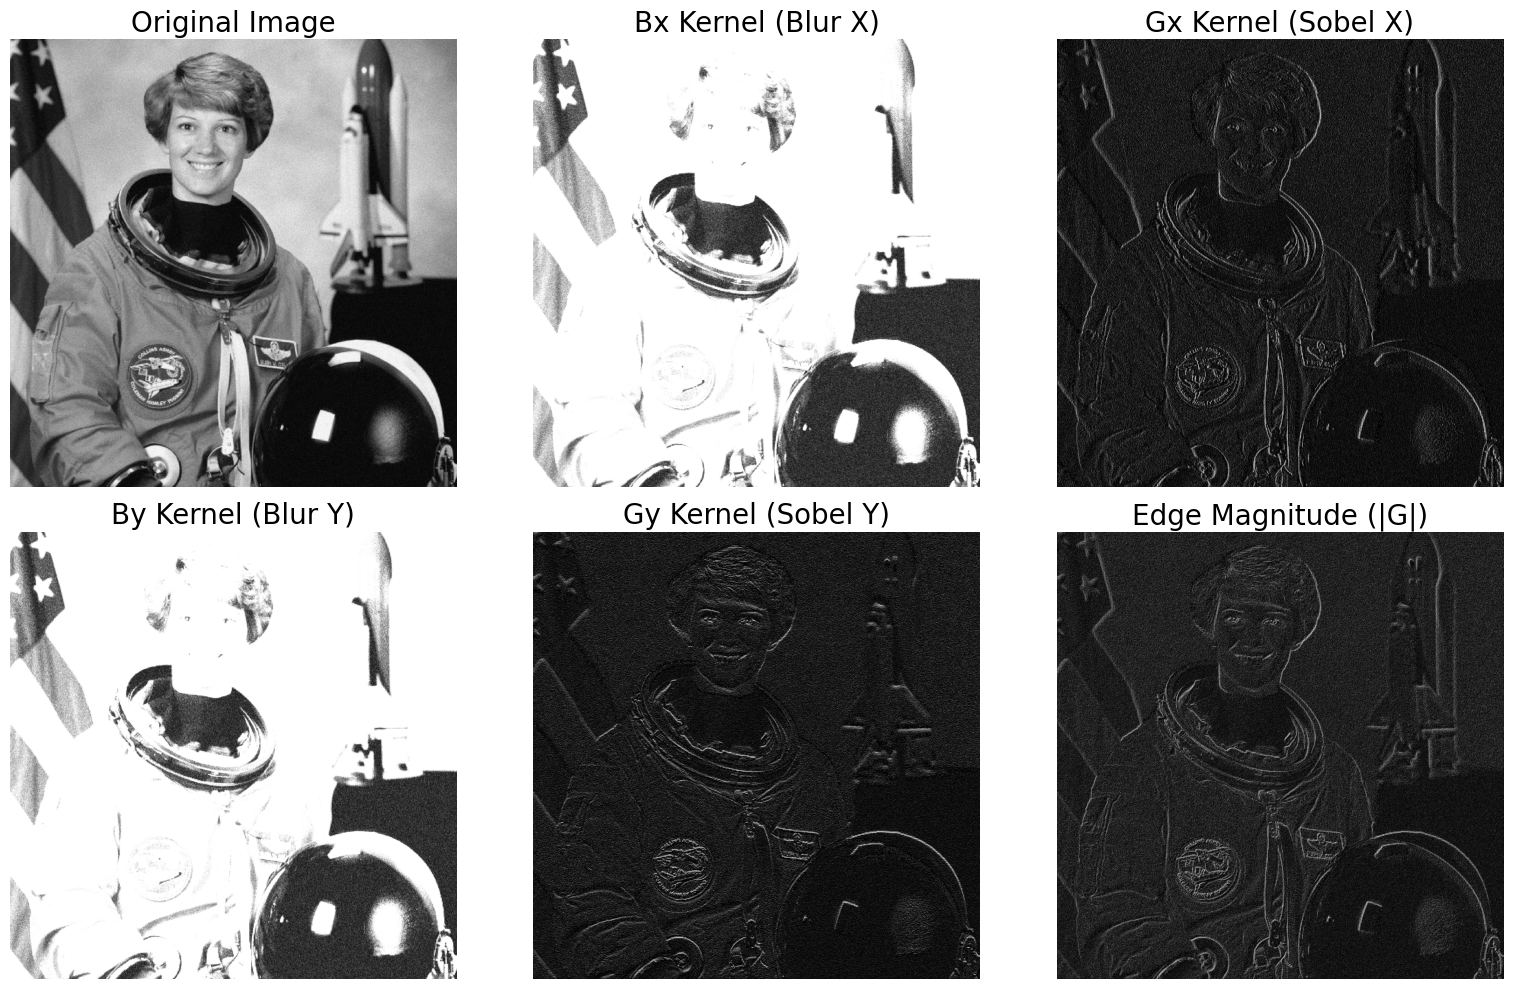

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# ---------------------------
# 1. Bx, By, Gx, Gy 커널 생성
# ---------------------------

# 블러(평균화) 커널
B = np.array([[1, 2, 1]], dtype=np.float32)

# 미분 커널
D = np.array([[-1, 0, 1]], dtype=np.float32)

# Bx: 수평 블러 커널
Bx = B  # 원본 B

# By: 수직 블러 커널
By = B.T  # B의 전치

# Gx: 블러 커널과 x 방향 미분 커널의 합성
Gx = np.dot(B.T, D)  # B의 전치와 D의 행렬 곱

# Gy: 블러 커널과 y 방향 미분 커널의 합성
Gy = np.dot(D.T, B)  # D의 전치와 B의 행렬 곱 

# ---------------------------
# 2. 이미지 불러오기 및 필터링
# ---------------------------

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE) 

# Bx와 By 커널을 사용해 이미지 필터링 (블러링)
blur_x = cv2.filter2D(image, -1, Bx)  # 수평 블러 적용
blur_y = cv2.filter2D(image, -1, By)  # 수직 블러 적용

# Gx와 Gy 커널을 사용해 이미지 필터링 (에지 검출)
edge_x = cv2.filter2D(image, -1, Gx)  # x 방향 에지
edge_y = cv2.filter2D(image, -1, Gy)  # y 방향 에지

# 엣지 강도 계산 (유클리드 거리)
magnitude = np.hypot(edge_x, edge_y)  # sqrt(edge_x^2 + edge_y^2)

# 엣지 강도를 0-255 범위로 정규화
magnitude = np.uint8(magnitude / magnitude.max() * 255)

# ---------------------------
# 3. 결과 시각화
# ---------------------------

# 폰트 사이즈
fs = 20

# 결과 시각화
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image", fontsize=fs)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Bx Kernel (Blur X)", fontsize=fs)
plt.imshow(blur_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Gx Kernel (Sobel X)", fontsize=fs)
plt.imshow(edge_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("By Kernel (Blur Y)", fontsize=fs)
plt.imshow(blur_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Gy Kernel (Sobel Y)", fontsize=fs)
plt.imshow(edge_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Edge Magnitude (|G|)", fontsize=fs)
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()